In [1]:
import os
import os.path
import sys
d = os.path.join(os.getcwd(), '..')
print(d)
sys.path.append(d)

C:\Users\Zachary\Documents\GitHub\COMP 3201 - TSP Evolutionary Algorithm\src\..


In [2]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure as Figure
import seaborn as sns
import numpy as np
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'png'

# https://pandas.pydata.org/pandas-docs/stable/visualization.html
# http://pandas.pydata.org/pandas-docs/version/0.13/visualization.html
# https://matplotlib.org/users/pyplot_tutorial.html

# Set up the style of the graphs, and display a sample graph
graph_style = 5
plt.style.use(plt.style.available[graph_style])  # 5, 14, 22
plt.figure(figsize=(30, 15))
sns.set_context("paper")

Warning! Takes approximately 1.5 seconds per decade
Warning! Takes approximately 1.5 seconds per decade


,Longitude (Range shifted),Latitude (Range shifted)
City,,
0,-2416.6667,-1774.99995
1,-2383.3333,-1241.66665
2,-2316.6667,-1724.99995
3,-2300.0000,-991.66665
4,-2300.0000,-1091.66665
5,-2300.0000,-1724.99995
6,-2250.0000,-1108.33335
7,-2233.3333,-958.33335
8,-2150.0000,-608.33335


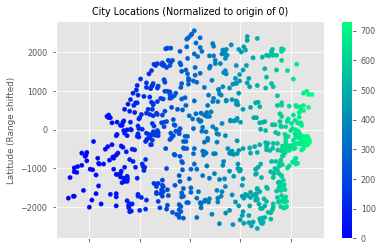

In [3]:
# Set Imports

# These imports do not need to change between runs.
from src.EA_Shell import EARunner as EA
from src.Setups.TSP.TSP_Display import GraphingHelper as Grapher
from src.Setups.TSP.TSP_Inputs.Optimums import get_best_path


# Modular Imports

# By changing these imports, you can easily redifine the problem you are attempting to solve,
# and the problem representation, without having to re-write much of the code.
from src.EA_Methods.List_Rep import ParentSelectionMethods as PSM
from src.EA_Methods.List_Rep import MutationMethods as MM
from src.EA_Methods.List_Rep import RecombinationMethods as RM
from src.EA_Methods.List_Rep import SurvivorSelectionMethods as SSM
from src.EA_Methods.List_Rep import PopulationManagementMethods as PMM
from src.Setups.TSP import TSP_LST as DEF


# Shell Object And Master Variable Initialization

# Select which TSP instance to solve
FILENUM             =      2

# Determine the genome length and initialize key data
genome_length       =      DEF.read_tsp_file(FILENUM)

#
opt_dist, opt_path, true_opt = get_best_path(FILENUM)

# Give the EARunner direct access to the modules which implement 
# various algortihms for each step of the EA, and their globals.
ea                  =      EA(PSM, RM, MM, SSM, DEF, PMM)

# Initialize the grapher with the appropriate data
grapher             =      Grapher(FILENUM)
grapher.start_up_display()
grapher.cities

In [4]:
# Modular Function Definitions

# By swapping out which functions are imported, but keeping the aliases,
# the entire structure of the EA can be changed without rewriting code
# in the main method.
initialize           = DEF.heuristic_cluster_initialization
eval_fitness         = DEF.euclidean_distance
parent_selection     = PSM.tournament
generate_offspring   = RM.order_crossover
apply_mutation       = MM.permutation_inversion
select_survivors     = SSM.replacement
prune_population     = PMM.genetic_engineering


# Set the desired functions and for the EA.
# Important note: The EARunner has a helper class which stores and handles the variables
# when it runs. It can be accessed after this call to set various rates and amounts.
ea.set_params(genome_length, eval_fitness, initialize, parent_selection, generate_offspring,
              apply_mutation, select_survivors, prune_population)


# Global Variable Initialization
generation_limit    =      25000
print_snapshot      =      generation_limit // 100

In [ ]:
op_fit, best_indivs, gencount, run_history, time_tuple = ea.run(generation_limit, print_gens=print_snapshot,
                                                               known_optimum=opt_dist ,true_opt=true_opt)

Generation: 250
  Best fitness: 274074.50576033647
  Avg. fitness: 276961.8007102239
Generation: 500
  Best fitness: 257259.5573192052
  Avg. fitness: 257606.5290580012
Generation: 750
  Best fitness: 248492.27547190638
  Avg. fitness: 249545.77551225718
Generation: 1000
  Best fitness: 241570.23402983212
  Avg. fitness: 242414.8076646601
Generation: 1250
  Best fitness: 235303.67738668813
  Avg. fitness: 235622.35744710887
Generation: 1500
  Best fitness: 229117.81088564597
  Avg. fitness: 229396.89661311003
Generation: 1750
  Best fitness: 221809.35989663965
  Avg. fitness: 222234.24747673701
Generation: 2000
  Best fitness: 217526.96991379792
  Avg. fitness: 218292.493673845
Generation: 2250
  Best fitness: 214042.45058539006
  Avg. fitness: 214653.16570162206
Generation: 2500
  Best fitness: 209952.84018145307
  Avg. fitness: 210494.85948876393
Generation: 2750
  Best fitness: 205515.16538163897
  Avg. fitness: 205944.46827179054
Generation: 3000
  Best fitness: 202833.08981766054


In [ ]:
df = pd.DataFrame(run_history)
df.columns = ['Fitness', 'Route']
df['Fitness'].plot(color='green')

In [ ]:
from math import pi, sin, cos  

counter = 0
prev = 0
last_sig = run_history[0][0]
plottable_tuples = []
for x in range(0, generation_limit-1):
    counter += 1
    fitness = run_history[x][0]
    
    if fitness != prev and counter >= 10 and last_sig - fitness > 5000:
        last_sig = fitness
        plottable_tuples.append((x, fitness, run_history[x][1]))
        counter = 1
    
    prev = fitness

plottable_tuples.append((generation_limit, run_history[-1][0], run_history[-1][1]))    
for x in plottable_tuples:
    print('Generation {: <5}: {:4.2f}'.format(x[0], x[1]))
    
grapher.generation_display(generation_limit, run_history[-1][0], run_history[-1][1])

In [ ]:
def alt_graph():
    x = grapher.cities[grapher.long_names[0]]
    y = grapher.cities[grapher.long_names[1]]

    for i in range(len(grapher.cities)):
        c1 = run_history[-1][1][i]
        c2 = run_history[-1][1][i % len(grapher.cities)-1]
        per = pi * i / len(grapher.cities)
        red_mod = max(cos(per), 0) * 0.3
        bright_mod = -min(cos(per), 0) * 0.3
        plt.plot([x[c1], x[c2]], [y[c1], y[c2]], color=[1-red_mod, bright_mod, bright_mod], marker='o')
    plt.title('City Locations (Normalized to origin of 0)')
    plt.show()

In [ ]:
grapher.generation_display(0, run_history[0][0], run_history[0][1])

In [ ]:
alt_graph()
# grapher.alt_generation_display(0, run_history[0][0], run_history[0][1])